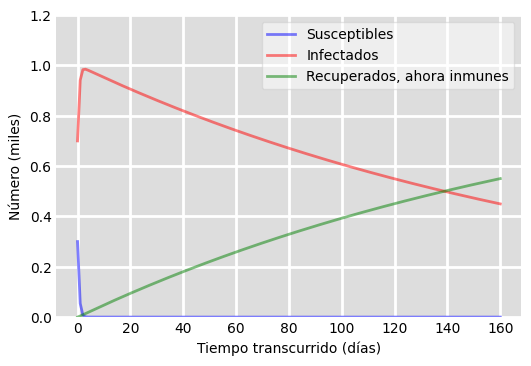

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 700,0 # NOrmal = 1,0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2, 1./200 # Normal = 0.1, 1/10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',dpi=100)
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptibles')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recuperados, ahora inmunes')
ax.set_xlabel('Tiempo transcurrido (días)')
ax.set_ylabel('Número (miles)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


## Lotka-Volterra Equations

* $x$: población de presas
* $y$: población de depredadores
* $\alpha$: tasa de reproducción de presas
* $\beta$: tasa con la que son cazadas las presas
* $\delta$: tasa con la que cazan los depredadores
* $\gamma$: tasa con la que se reproducen los depredadores

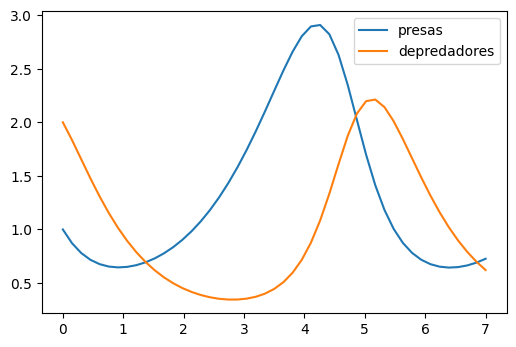

In [17]:
from edo import EDO_RK_Solver
import numpy as np

def F(t,ys):
    x = ys[0]
    y = ys[1]
    alpha = 1
    beta = 1
    delta = 1
    gamma = 1.5
    return np.array([alpha*x-beta*x*y,delta*x*y-gamma*y])

condiciones_iniciales = np.array([1,2])

solver = EDO_RK_Solver(f=F,order=2,n_eqs=2)
solver.fit(a=0,b=7,
            y0=condiciones_iniciales,
            h=0.15)
solver.plot(labels=['presas','depredadores'],plot_nodes=False)

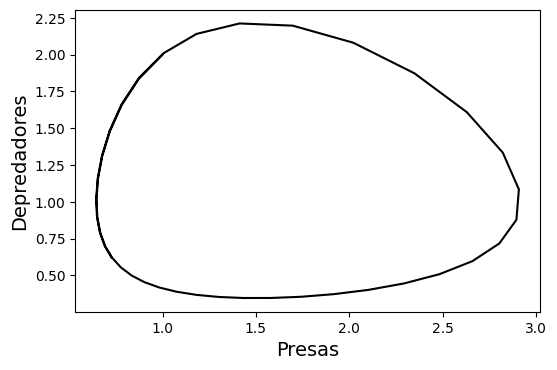

In [18]:
import matplotlib.pyplot as plt

presas = solver.ys[0,:]
depredadores = solver.ys[1,:]

plt.figure(dpi=100)
plt.plot(presas,depredadores,color='black')
plt.xlabel("Presas",fontsize=14)
plt.ylabel("Depredadores",fontsize=14)
plt.show()